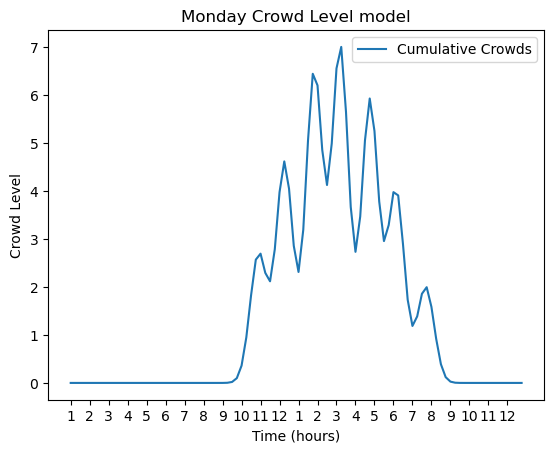

In [190]:
# Create Monday Tink Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

sig = 0.45
gaps = []
means = [[9.8, 11.2, 12.8, 14.2, 15.8, 17.2, 18.8]]

x = np.arange(24, step=0.25)

for mean in means[0]: 
    gaps.append(norm.pdf(x, mean, sig))

# Crowd level change over the whole day
mu = 14
sig = 3
whole_y = norm.pdf(x, mu, sig)

# Cumulative crowd level model
cum_y = np.sum(gaps, axis=0)
cum_y = np.einsum("i,i->i", cum_y, whole_y)

# Normalize to make the peak a crowd level of 7
cum_y = cum_y * (7 / np.max(cum_y))

plt.figure()
plt.plot(x, cum_y, label=f"Cumulative Crowds")
plt.title("Monday Crowd Level model")
plt.xlabel("Time (hours)")
plt.xticks(np.arange(24), np.concatenate((np.arange(1, 13), np.arange(1, 13))))
plt.ylabel("Crowd Level")
plt.legend()
plt.show()


In [194]:
import numpy as np
import matplotlib.pyplot as plt

# Number of examples to generate
n = 1000

examples = []
for j in range(n):
    samples = []
    for i in range(len(x)):
        sample = np.random.normal(cum_y[i], 1, 1)
        if sample <= 0:
            samples.append(0)
        elif sample >= 10:
            samples.append(10)
        else:
            samples.append(int(np.floor(sample)[0]))
    
    examples.append(samples)

examples = np.array(examples)
print(examples.shape)
    

(1000, 96)


In [195]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=1)
gmm.fit(examples)

GaussianMixture()

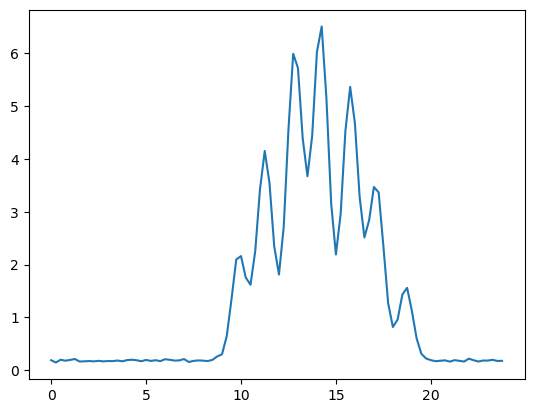

In [196]:
plt.plot(x, gmm.means_[0])

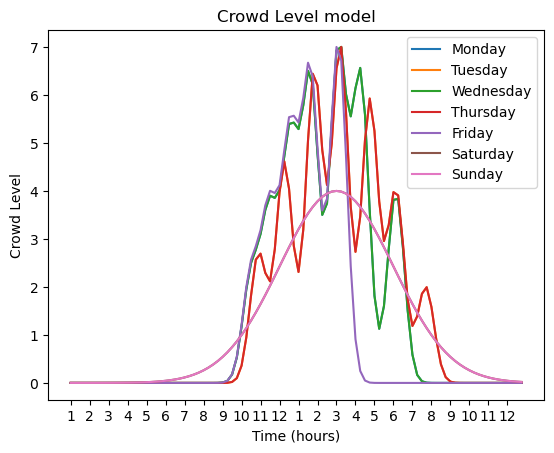

In [197]:
'''
Create synthetic Tink distributions
'''
import numpy as np
import matplotlib.pyplot as plt

sig = 0.45
means = [[9.4, 10.4, 11.5, 12.6, 14.1, 15.3, 17.2],
         [9.8, 11.2, 12.8, 14.2, 15.8, 17.2, 18.8],
         [9.4, 10.4, 11.5, 12.6, 14.1, 15.3, 17.2],
         [9.8, 11.2, 12.8, 14.2, 15.8, 17.2, 18.8],
         [9.4, 10.4, 11.5, 12.6, 14.1]]

days = []

x = np.arange(24, step=0.25)

mu = 14
whole_sig = 3
whole_y = norm.pdf(x, mu, whole_sig)

for day_means in means: 
    gaps = []
    for mean in day_means:
        gaps.append(norm.pdf(x, mean, sig))
        
    days.append(np.einsum("i,i->i", np.sum(gaps, axis=0), whole_y))
    days[-1] = days[-1] * (7 / np.max(days[-1]))
    
days.append(whole_y * (4/np.max(whole_y)))
days.append(whole_y * (4/np.max(whole_y)))
    
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure()
for i in range(len(days)):
    plt.plot(x, days[i], label=day_names[i])
    
plt.title("Crowd Level model")
plt.xlabel("Time (hours)")
plt.xticks(np.arange(24), np.concatenate((np.arange(1, 13), np.arange(1, 13))))
plt.ylabel("Crowd Level")
plt.legend()
plt.show()

In [198]:
'''
Generate example data from these distributions
'''
# Number of examples to generate per day
n = 250

examples = []
for day in days:
    for j in range(n):
        samples = []
        for i in range(len(x)):
            sample = np.random.normal(day[i], 1, 1)
            if sample <= 0:
                samples.append(0)
            elif sample >= 10:
                samples.append(10)
            else:
                samples.append(int(np.floor(sample)[0]))
        
        examples.append(samples)

examples = np.array(examples)
print(examples.shape)

(1750, 96)


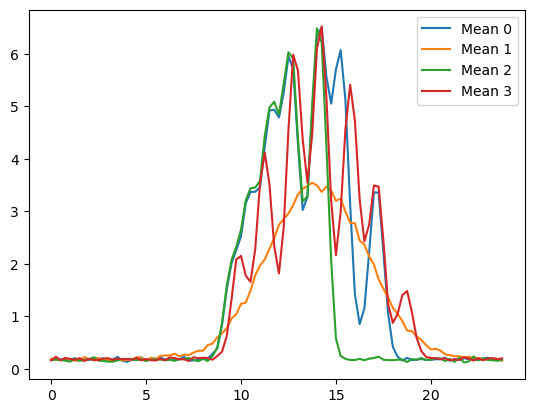

In [216]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(examples)

plt.plot(x, gmm.means_[0], label="Mean 0")
plt.plot(x, gmm.means_[1], label="Mean 1")
plt.plot(x, gmm.means_[2], label="Mean 2")
plt.plot(x, gmm.means_[3], label="Mean 3")
plt.legend()

In [217]:
import joblib

joblib.dump(gmm, "tink_model.pkl")

['tink_model.pkl']